In [1]:
%matplotlib inline
import hyperspy.api as hs
from esmpy.conf import DATASETS_PATH
from pathlib import Path

# Load a spectrum image

In [5]:
input_filename = "1613 SI HAADF 610 kx.emd"
spim = hs.load(input_filename)[-1]
spim.crop(2,0.3,19.0)
spim.crop(1,100,400)
(spim.data.sum(axis = 2) == 0).sum()

514

In [11]:
spim.metadata.Sample.elements = ['O', 'Al', 'Ni', 'La', 'Nd']

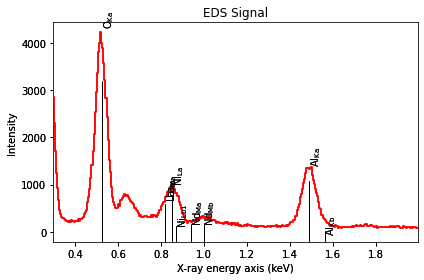

In [16]:
spim.sum(axis=(0,1)).isig[0.3:2.0].plot(True)

In [35]:
from esmpy.utils import bin_spim

a = bin_spim(spim.data, 150, 200)

spim = hs.signals.Signal1D(a)
spim.set_signal_type("EDS_ESMPY")
spim.set_analysis_parameters(beam_energy = 200, azimuth_angle = 0.0, elevation_angle = 35.0, tilt_stage = 15.0, elements = ["O","Al","Si","Mo","Ni","Nd","La","Cu"], thickness = 50e-7, density = 7.0, detector_type = "SDD_efficiency.txt", width_slope = 0.01, width_intercept = 0.065, xray_db = "default_xrays.json")
spim.axes_manager[2].scale = 0.005
spim.axes_manager[2].offset = 0.2975
spim.save("1613_NLNO_binned_2.hspy")

In [4]:
s = hs.load("1613_NLNO_binned_2.hspy")

s.sum(axis = 2).mean().data

array([22.34333333])

# Browse the signal

⚠️ 3 windows will pop up.

- One window correspond to a 2D representation of the spim (sum along the energy direction) a green rectangle will be displayed on top of it, it corresponds to the selected area.
- One window correspond to the first pixel (top left) of the spectrum image (you can ignore it).
- The last window correspond to the average of the selected spectra



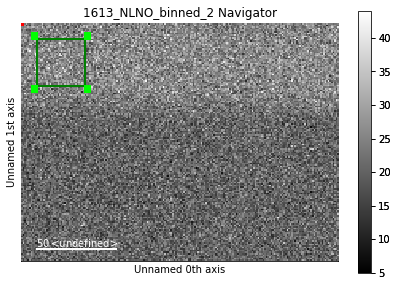

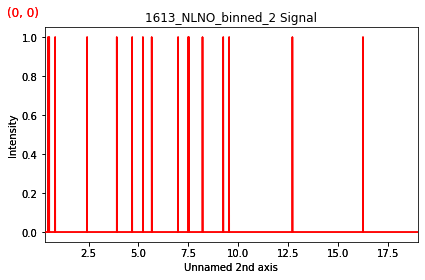

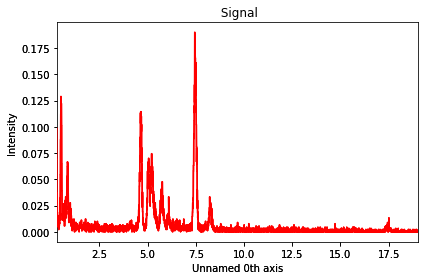

In [36]:
scale_h, scale_v= spim.axes_manager[0].scale,spim.axes_manager[1].scale
offset_h, offset_v = spim.axes_manager[0].offset, spim.axes_manager[1].offset

haadf_ROI=hs.roi.RectangularROI((10*scale_h)+ offset_h,
                            (10*scale_v)+offset_v,
                            (40*scale_h)+offset_h,
                            (40*scale_v)+offset_v)
# arguments = left, top, right, bottom in pixels*scale
spim.plot()
spim_ROI=haadf_ROI.interactive(spim)
# The HAADF and SPIM windows with their respective ROIs. The two ROIs are connected so that the selected area in the HAADF is the same as the one on the SPIM.

spectrum=hs.interactive(spim_ROI.mean,
           event=spim_ROI.axes_manager.events.any_axis_changed,
           recompute_out_event=None)
spectrum.plot(True)

# Save the selected average spectrum

In [ ]:
output_filename = str(DATASETS_PATH / Path('selected_spectrum.hspy'))
spectrum.save(output_filename)